# Plotting Model Predictions 

In [34]:
# Import necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy as scp
import matplotlib.pyplot as plt
import os
import dnnregressor_predictor as dnn_pred
import dnnregressor_model_and_input_fn as dnn_model_input
import make_data_wfpt as mdw
import make_data_sin as mds
import seaborn as sns

In [38]:



hyper_params = pd.read_csv('/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_from_simulation_mix_08_16_18_19_21_26/dnn_training_results_mse_from_simulation_mix_08_16_18_19_21_26.csv',
                          converters = {'hidden_units':eval,
                                        'activations':eval})

model_params = hyper_params.to_dict(orient = 'list')
for key in model_params.keys():
    model_params[key] = model_params[key][0]

In [37]:
# Generate a dataset wfpt
dataset,_, __ = mdw.make_data_rt_choice(v_range = [1,1], # uniform [0.6, 0.6]
                                        a_range = [2, 2], # unifor
                                        w_range = [0.5, 0.5],  # uniform
                                        rt_params = [1,2], # gamma(1,2)
                                        n_samples = 10000,
                                        mixture_p = 0.1,          
                                        write_to_file = False)

datapoint 0 generated
datapoint 1000 generated
datapoint 2000 generated
datapoint 3000 generated
datapoint 4000 generated
datapoint 5000 generated
datapoint 6000 generated
datapoint 7000 generated
datapoint 8000 generated
datapoint 9000 generated
label 0 generated
label 1000 generated
label 2000 generated
label 3000 generated
label 4000 generated
label 5000 generated
label 6000 generated
label 7000 generated
label 8000 generated
label 9000 generated


In [40]:
# Make dataset feedable to tensorflow (wfpt)
features, labels, __, ___ = mdw.train_test_split_rt_choice(data = dataset,
                                                           p_train = 1,
                                                           write_to_file = False,
                                                           from_file = False)

# Make dataset feedable to tensorflow (sin)
# features_sin, labels_sin, __, __ = mds.train_test_split(features_sin, 
#                                                        labels_sin, 
#                                                        p = 1)

In [41]:
# Make feature columns (wfpt)
feature_columns = dnn_model_input.make_feature_columns_numeric(features = features)
model_params['feature_columns'] = feature_columns

In [42]:
# Reinstantiate model
my_predictor = dnn_pred.get_dnnreg_predictor(model_directory = '/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_from_simulation_mix_08_16_18_19_21_26/',
                                             params = model_params)

In [49]:
# Get Predictions (wfpt)
model_checkpoint= 'model.ckpt-420000'
my_predictions = dnn_pred.get_predictions(regressor = my_predictor,
                                         features = features,
                                         labels = labels,
                                         checkpoint = "/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_from_simulation_mix_08_16_18_19_21_26/" + model_checkpoint)




In [50]:
# concatenate predictions with dataset
new_col = pd.DataFrame(my_predictions, columns = ['pred_likelihood'])
data_pred = pd.concat([dataset, new_col], axis = 1)

# Prepare for plotting
data_pred.sort_values('rt', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
data_pred_long = data_pred.melt(id_vars = ['rt', 'choice'], value_vars = ['nf_likelihood', 
                                              'pred_likelihood'], 
                                               var_name = 'group', 
                                               value_name = 'likelihood')

[(-1, 1)]

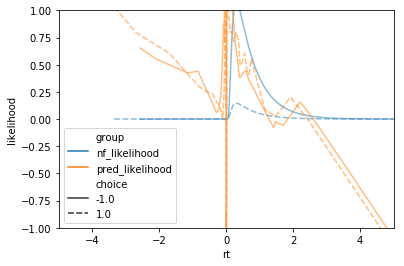

In [51]:
# Plot
ax = sns.lineplot(x = "rt", 
                  y = "likelihood", 
                  data = data_pred_long, 
                  hue = 'group',
                  style = 'choice',
                  alpha = 0.5)


# g.add_legend(title="Meal")
# g.set_axis_labels("Total bill ($)", "")
ax.set(xlim=(-5, 5))
ax.set(ylim=(-1, 1))
# g.despine(trim=True)
# g.fig.set_size_inches(6.5, 3.5)
# g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
# plt.setp(g.ax.get_yticklabels(), rotation=30);

In [39]:
model_params

{'hidden_units': [150, 40, 40],
 'activations': ['relu', 'relu', 'relu'],
 'output_activation': 'linear',
 'optimizer': 'adam',
 'learning_rate': 0.005,
 'loss_fn': 'mse',
 'beta1': 0.9,
 'beta2': 0.9990000000000001,
 'rho': 0.9,
 'l_1': 0.0,
 'l_2': 0.0,
 'batch_size': 10000,
 'mse_test': 32.600433,
 'mae_test': 1.8839523999999999,
 'training_steps': 14000,
 'training_time': 2664.7,
 'time_started': '08_15_18_18_57_28'}